# MPESA STATEMENT ANALYSIS 

# 1.0 Business Understanding 
## 1.1 Business Problem 
Difficulty in gaining comprehensive insights into financial transactions and managing expenses effectively using M-Pesa statements, hindering accurate expense tracking, budgeting, financial goal setting, and fraud detection for businesses. By leveraging these insights, individuals can enhance their financial management practices, optimize expenses, mitigate risks, and make strategic decisions to drive growth and financial stability.

## 1.2 Objectives 
1. To track and categorize expenses accurately by analyzing M-Pesa transactions.
2. To create and maintain a budget based on insights from the analysis of M-Pesa statements, identifying areas for cost-cutting and efficient fund allocation.
3. To set financial goals and monitor progress by reviewing and analyzing M-Pesa transactions.
4. To detect and mitigate fraud risks by carefully examining M-Pesa statements for unauthorized or suspicious transactions and promptly reporting any discrepancies.

# 2.0 Data understanding 
The data came from 1 year 2 months mpesa statement for Nelson Kibet Kemboi 

In [34]:
#importing neccessary libraries 
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt   
%matplotlib inline 
import seaborn as sns 
import warnings 

# Ignore any warning messages
warnings.filterwarnings("ignore")

# Set seaborn grid style to "darkgrid"
sns.set_style("darkgrid")



In [35]:
#reading file one 
data1 = pd.read_excel('mpesa_data1.xlsx')
#reading file two
data2 = pd.read_excel('mpesa_data2.xlsx')
#reading file three 
data3 = pd.read_excel('mpesa_data3.xlsx')

In [36]:
#merging all dataframes 
merged_data = pd.concat([data2, data2, data3], ignore_index=True)
#convert to  new excel file 
merged_data.to_excel('merged_data.xlsx', index=False)
#checking the new dataframe 
merged_data

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,RB69252JA1,2023-02-06 18:36:56,Customer Transfer to -,Completed,NaN,-500,115
1,NaN,NaN,07******122 WINNY CHEPKOECH,NaN,NaN,NaN,NaN
2,RB6424ZJI6,2023-02-06 18:36:02,Customer Transfer of Funds Charge,Completed,NaN,-6,615
3,RB6424ZJI6,2023-02-06 18:36:02,Customer Transfer to -,Completed,NaN,-200,621
4,NaN,NaN,07******970 CHEPKIRUI SHARON,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7932,NaN,NaN,Original conversation ID is 714593888236.,NaN,NaN,NaN,NaN
7933,QD15N3LHJR,2022-04-01 16:27:30,Business Payment from 300600 Equity Bulk Accou...,Completed,1000,NaN,1100
7934,NaN,NaN,Original conversation ID is 353365002187.,NaN,NaN,NaN,NaN
7935,QD10MOACVG,2022-04-01 13:03:15,Business Payment from 300600 Equity Bulk Accou...,Completed,100,NaN,100


In [37]:
#checking shape of the data 
merged_data.shape


(7937, 7)

# 2.1 Data Cleaning 

In [38]:
# defining a function to check for missing values percentages 
def checking_missing_values(data):
    missing_values = data.isna().sum()/len(data)*100
    return missing_values

In [39]:
#calling a function to check percentage of missing values 
checking_missing_values(merged_data)

Receipt No.           39.536349
Completion Time       39.536349
Details                1.637898
Transaction Status    41.123850
Paid In               87.904750
Withdrawn             49.981101
Balance               39.536349
dtype: float64


- Receipt No.: 39.536349 missing values
- Completion Time: 39.536349 missing values
- Details: 1.637898 missing values
- Transaction Status: 41.123850 missing values
- Paid In: 87.904750 missing values
- Withdrawn: 49.981101 missing values
- Balance: 39.536349 missing values

In [40]:
#writing a function to drop missing values
def dropping_missing_values(data, columns): 
    missing_value = data.dropna(subset=columns, inplace=True)
    return missing_value


In [41]:
#calling column to drop missing values 
dropping_missing_values(merged_data, 'Withdrawn')

In [42]:
#rechecking the missing values again 
checking_missing_values(merged_data)

Receipt No.            0.000000
Completion Time        0.000000
Details                0.000000
Transaction Status     2.443325
Paid In               96.700252
Withdrawn              0.000000
Balance                0.000000
dtype: float64

In [43]:
#dropping missing values in transactin status column 
dropping_missing_values(merged_data, 'Transaction Status')


In [44]:
#recheking missing values 
checking_missing_values(merged_data)

Receipt No.            0.000000
Completion Time        0.000000
Details                0.000000
Transaction Status     0.000000
Paid In               96.617609
Withdrawn              0.000000
Balance                0.000000
dtype: float64

Since we have dropped all missing values except Paid In colum since we will need it for further analysis, next thing we will check for duplicates 

In [45]:
# creating a new paid in dataframe and convertingt to int
paid_in_df = merged_data['Paid In'].copy()
paid_in_df = paid_in_df.to_frame()


In [46]:
#dropping missing values in paid in column 
dropping_missing_values(paid_in_df, 'Paid In')

There are some missing values in pain in data so we drop them 

In [47]:
#dropping paid in column 
merged_data.drop('Paid In', axis=1, inplace=True)


In [48]:
#change the column to int type 
paid_in_df = paid_in_df[paid_in_df['Paid In'] != 'Paid In']
paid_in_df['Paid In'] = paid_in_df['Paid In'].astype(int)


In [49]:
#checking for duplicates
duplicates = merged_data.duplicated(keep=False)
duplicated_rows = merged_data[duplicates]
duplicated_rows

,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
0,RB69252JA1,2023-02-06 18:36:56,Customer Transfer to -,Completed,-500,115
2,RB6424ZJI6,2023-02-06 18:36:02,Customer Transfer of Funds Charge,Completed,-6,615
3,RB6424ZJI6,2023-02-06 18:36:02,Customer Transfer to -,Completed,-200,621
5,RB69243B1X,2023-02-06 18:25:52,Merchant Payment to 867307 CLEAN SHELF SUPERMA...,Completed,-120,821
6,RB6323HZ51,2023-02-06 18:19:01,Customer Transfer of Funds Charge,Completed,-6,941
...,...,...,...,...,...,...
7651,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
7711,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
7774,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
7836,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance


In [50]:
#dropping duplicated values 
merged_data.drop_duplicates(inplace=True)


In [51]:
#rechecking the duplicates 
merged_data.duplicated().value_counts()

False    2408
Name: count, dtype: int64

In [52]:
#checkingdata information 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2408 entries, 0 to 7929
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Receipt No.         2408 non-null   object
 1   Completion Time     2408 non-null   object
 2   Details             2408 non-null   object
 3   Transaction Status  2408 non-null   object
 4   Withdrawn           2408 non-null   object
 5   Balance             2408 non-null   object
dtypes: object(6)
memory usage: 131.7+ KB


From here it can be seen that all columns are objects we need to convert the `balance` and `withdrawn` to intergers. 

In [53]:
#converting objects to int 
merged_data['Withdrawn'] = pd.to_numeric(merged_data['Withdrawn'], errors='coerce')
merged_data['Withdrawn'] = merged_data['Withdrawn'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

merged_data['Balance'] = pd.to_numeric(merged_data['Balance'], errors='coerce')
merged_data['Balance'] = merged_data['Balance'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)


In [54]:
#removing negative sign on withdawn column
merged_data['Withdrawn'] = merged_data['Withdrawn'].abs()


In [55]:
clean_shelf_rows = merged_data[merged_data['Details'].str.contains('Absa')]
clean_shelf_rows

,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
135,RAS8DSXWHA,2023-01-28 19:01:17,Pay Bill to 303030 - Absa Bank Kenya PLC Acc. ...,Completed,37800,1253
2020,QIS3TDMPSV,2022-09-28 14:19:16,Pay Bill to 303030 - Absa Bank Kenya PLC Acc. ...,Completed,1500,393
2021,QIS3TDIY09,2022-09-28 14:17:53,Pay Bill to 303030 - Absa Bank Kenya PLC Acc. ...,Completed,48500,1893
2098,QIM2GS3UDM,2022-09-22 18:18:18,Pay Bill to 303030 - Absa Bank Kenya PLC Acc. ...,Completed,21500,977
2186,QIC9UF9YD3,2022-09-12 17:20:02,Pay Bill to 303030 - Absa Bank Kenya PLC Acc. ...,Completed,3500,2800
2405,QI228QLKHA,2022-09-02 12:56:29,Pay Bill to 303030 - Absa Bank Kenya PLC Acc. ...,Completed,45000,29


since now our data is clean we can proceed to EDA 

# 3.0 EDA 

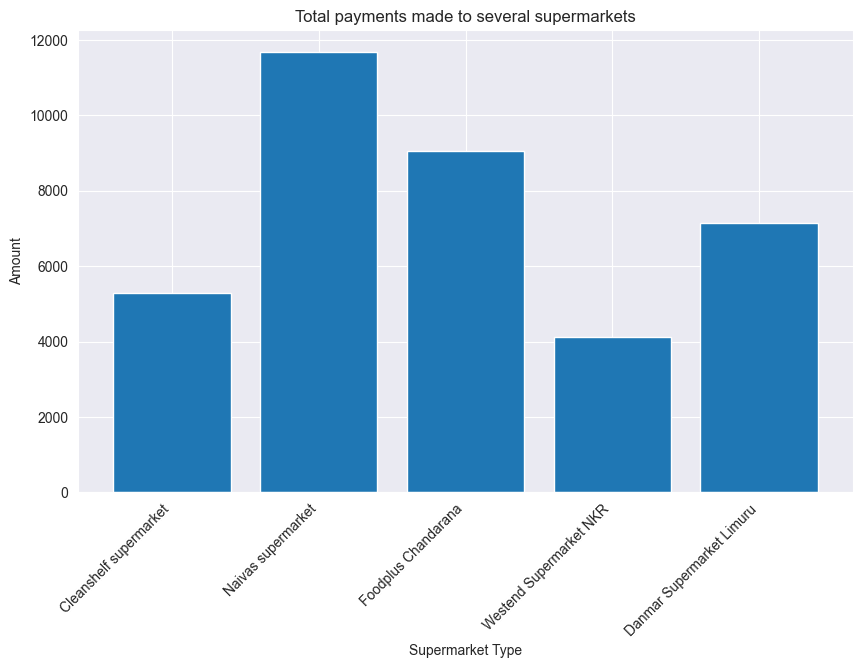

In [56]:
# Filter the dataframe for supermarket payments
cleanshelf_transactions = merged_data[merged_data['Details'].str.contains('CLEAN SHELF', case=False)]
naivas_transactions = merged_data[merged_data['Details'].str.contains('NAIVAS', case=False)]
foodplus_transactions = merged_data[merged_data['Details'].str.contains('Chandarana', case=False)]
westend_transactions = merged_data[merged_data['Details'].str.contains('WESTEND', case=False)]
danmar_transactions = merged_data[merged_data['Details'].str.contains('DANMAR', case=False)]

# Calculate the total payments for several supermarkets
cleanshelf_total = cleanshelf_transactions['Withdrawn'].sum()
naivas_total = naivas_transactions['Withdrawn'].sum()
foodplus_total = foodplus_transactions['Withdrawn'].sum()
westend_total = westend_transactions['Withdrawn'].sum()
danmar_total = danmar_transactions['Withdrawn'].sum()

# Create a bar plot
labels = ['Cleanshelf supermarket', 'Naivas supermarket', 'Foodplus Chandarana', 'Westend Supermarket NKR', 'Danmar Supermarket Limuru']
amounts = [cleanshelf_total, naivas_total, foodplus_total, westend_total, danmar_total]

plt.figure(figsize=(10, 6))  # Increase the figure size (width: 10 inches, height: 6 inches)
plt.bar(labels, amounts)

# Customize the plot
plt.title('Total payments made to several supermarkets')
plt.xlabel('Supermarket Type')
plt.ylabel('Amount')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right

# Display the plot
plt.show()


It can be seen that Naivas followed by cleanshelf are the most payments made 

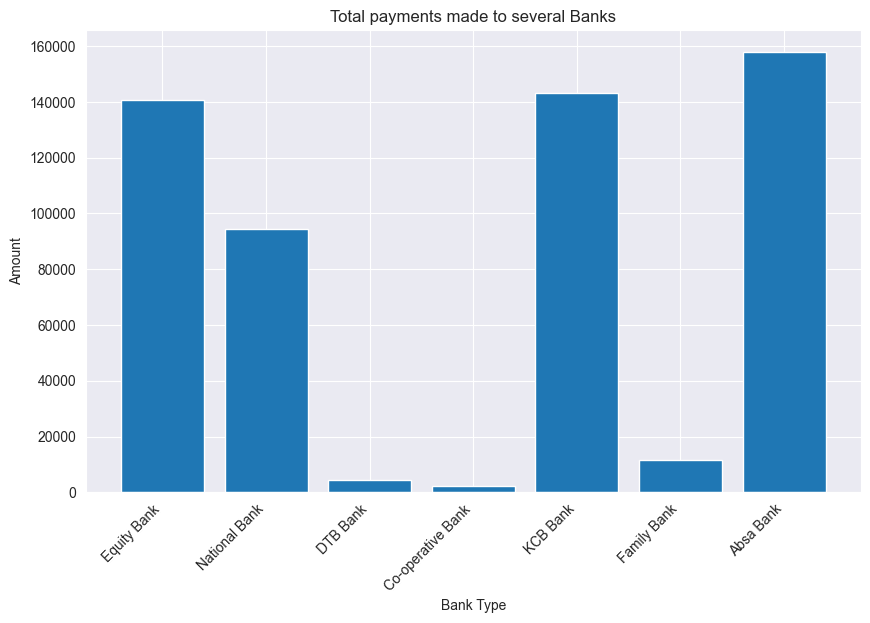

In [57]:
import matplotlib.pyplot as plt

# Filtering dataframe for all payments made to banks
equity_transaction = merged_data[merged_data["Details"].str.contains('Equity', case=False)]
national_transaction = merged_data[merged_data["Details"].str.contains('NBK', case=False)]
dtb_transaction = merged_data[merged_data["Details"].str.contains('DTB', case=False)]
coop_transaction = merged_data[merged_data["Details"].str.contains('Co-operative', case=False)]
kcb_transaction = merged_data[merged_data["Details"].str.contains('KCB', case=False)]
family_transaction = merged_data[merged_data["Details"].str.contains('Family', case=False)]
absa_transaction = merged_data[merged_data["Details"].str.contains('Absa', case=False)]

# Calculate the total payments for several banks
equity_total = equity_transaction['Withdrawn'].sum()
national_total = national_transaction['Withdrawn'].sum()
dtb_total = dtb_transaction['Withdrawn'].sum()
coop_total = coop_transaction['Withdrawn'].sum()
kcb_total = kcb_transaction['Withdrawn'].sum()
family_total = family_transaction['Withdrawn'].sum()
absa_total = absa_transaction['Withdrawn'].sum()

# Create a bar plot
labels = ['Equity Bank', 'National Bank', 'DTB Bank', 'Co-operative Bank', 'KCB Bank', 'Family Bank', 'Absa Bank']
amounts = [equity_total, national_total, dtb_total, coop_total, kcb_total, family_total, absa_total]

plt.figure(figsize=(10, 6)) 
plt.bar(labels, amounts)

# Customize the plot
plt.title('Total payments made to several Banks')
plt.xlabel('Bank Type')
plt.ylabel('Amount')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right

# Display the plot
plt.show()


`ABSA bank, KCB and Equity leads` with payments made which is over `140,000` with `DTB, Family` and `Co-operative` recording lesser payments of below `20,000.`

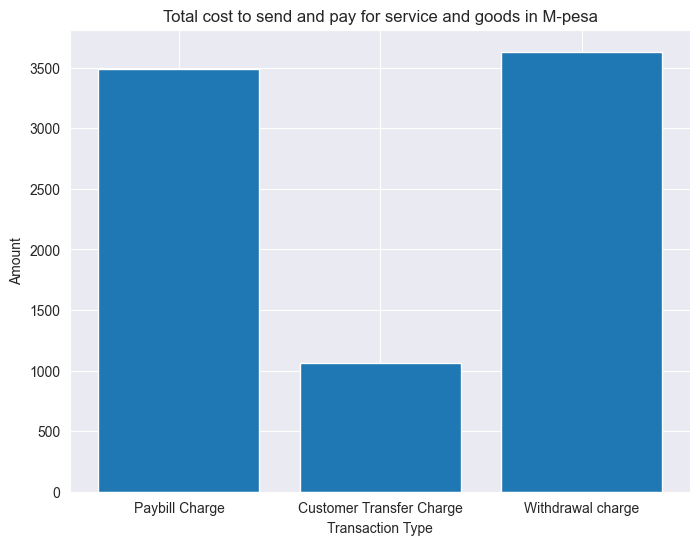

In [58]:
#filtering the dataframe to get charges 
pabill_transaction = merged_data[merged_data["Details"].str.contains('Pay Bill Charge', case=False)]
customer_sent_transaction = merged_data[merged_data["Details"].str.contains('Customer Transfer of Funds Charge', case=False)]
withdrawal_transaction = merged_data[merged_data["Details"].str.contains('Withdrawal Charge', case=False)]
# Calculate the total payments cost several charges 
paybill_total = pabill_transaction['Withdrawn'].sum()
customer_total = customer_sent_transaction['Withdrawn'].sum()
withdrawal_total = withdrawal_transaction['Withdrawn'].sum()

labels = ['Paybill Charge', 'Customer Transfer Charge', 'Withdrawal charge']
amount = [paybill_total, customer_total, withdrawal_total]

plt.figure(figsize=(8, 6)) 
plt.bar(labels, amount)

# Customize the plot
plt.title('Total cost to send and pay for service and goods in M-pesa')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')

# Display the plot
plt.show()


From the graph it can be seen that most of the charges were deducted from paybill payments and withdrawing of money

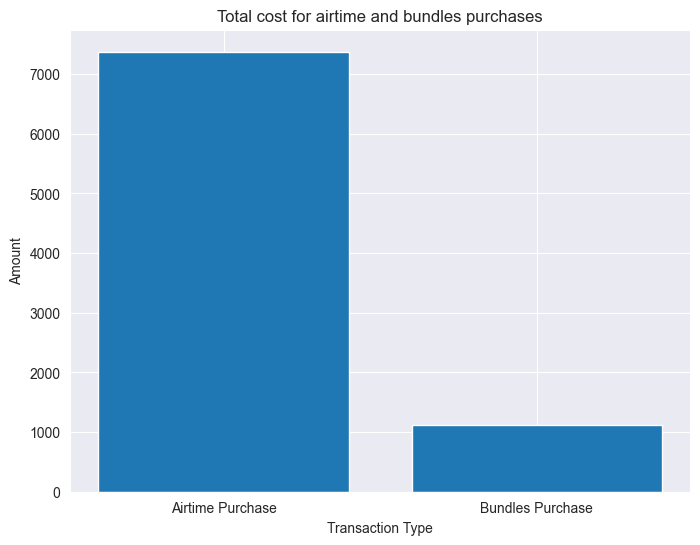

In [59]:
#filtering the dataframe to get sevral payments 
airtime_transaction = merged_data[merged_data["Details"].str.contains('Airtime Purchase', case=False)] 
bundles_transaction = merged_data[merged_data["Details"].str.contains('Buy Bundles Online', case=False)] 

#calculating totals for several purchases 
airtime_total = airtime_transaction['Withdrawn'].sum()
bundles_total = bundles_transaction['Withdrawn'].sum()

labels = ['Airtime Purchase', 'Bundles Purchase']
amount = [airtime_total, bundles_total]

plt.figure(figsize=(8, 6)) 
plt.bar(labels, amount)

# Customize the plot
plt.title('Total cost for airtime and bundles purchases')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')

# Display the plot
plt.show()

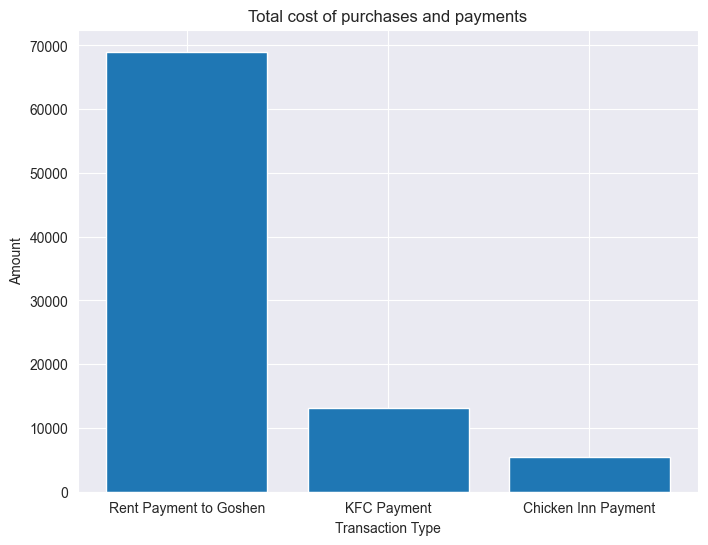

In [60]:
# Filtering the dataframe to get several payments
rent_transaction = merged_data[merged_data["Details"].str.contains('Goshen', case=False)]
kfc_transaction = merged_data[merged_data["Details"].str.contains('KFC', case=False)]
chicken_transaction = merged_data[merged_data["Details"].str.contains('CHICKEN', case=False)]

# Getting the amount used to make purchases and payments
rent_total = rent_transaction['Withdrawn'].sum()
kfc_total = kfc_transaction['Withdrawn'].sum()
chicken_total = chicken_transaction['Withdrawn'].sum()

labels = ['Rent Payment to Goshen', 'KFC Payment', 'Chicken Inn Payment']
amounts = [rent_total, kfc_total, chicken_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, amounts)

# Customize the plot
plt.title('Total cost of purchases and payments')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')

# Display the plot
plt.show()


Text(0, 0.5, 'Amount')

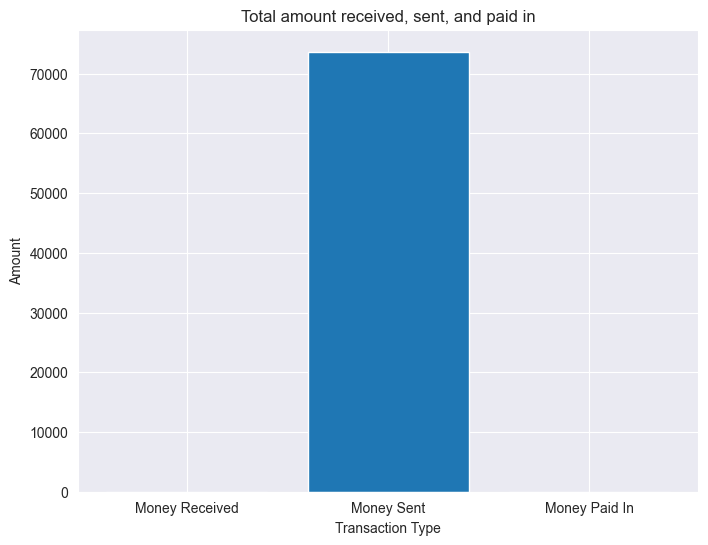

In [62]:
# Filtering the dataframe to get money received and sent
sent_transaction = merged_data[merged_data["Details"].str.contains('Customer Transfer', case=False)]
received_transaction = merged_data[merged_data["Details"].str.contains('Funds received', case=False)]

# Getting the amount totals
sent_total = sent_transaction['Withdrawn'].sum()
received_total = received_transaction['Withdrawn'].sum()

# Calculate the total amount from the 'paid_in_df'
paid_in_total = paid_in_df['Paid In'].sum()

labels = ['Money Received', 'Money Sent', 'Money Paid In']
amounts = [received_total, sent_total, paid_in_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, amounts)

# Customize the plot
plt.title('Total amount received, sent, and paid in')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')

# Display the plot
plt.show()



In [65]:
paid_in_df

,Paid In
